# Dexamethasone Treated A549 ATAC Peak Embedding

In [144]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import pickle as pkl
from scipy.io import mmread

sc.settings.verbosity = 3

In [145]:
def read_data(path):
    adata = sc.read_mtx(path + "_peak_count.txt.gz").T
    adata.obs = pd.read_csv(path + "_cell.txt.gz", index_col=0, compression='gzip')
    adata.var = pd.read_csv(path + "_peak.txt.gz", index_col=0, compression='gzip')
    return adata

atac_adata = read_data("../../sci-car/GSM3271041_ATAC_sciCAR_A549")
atac_adata = atac_adata[atac_adata.obs.group.str.contains("^A549"), :]


atac_only_adata = read_data("../../sci-car/GSM3271043_ATAC_only_A549")
atac_only_adata = atac_only_adata[atac_only_adata.obs.group.str.contains("^A549"), :]

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
AnnData expects .var.index to contain strings, but your first indices are: Int64Index([1, 2], dtype='int64', name='id'), …
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .var.index to contain strings, but your first indices are: Int64Index([1, 2], dtype='int64', name='id'), …


In [146]:
adata = sc.concat(adatas=[atac_adata, atac_only_adata])

adata.var['peak'] = atac_adata.var['peak'].tolist()
adata.var['chr'] = [str(i) for i in atac_adata.var['chr'].tolist()]
adata.var['start'] = atac_adata.var['start'].tolist()
adata.var['end'] = atac_adata.var['end'].tolist()

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [147]:
adata.var.index = adata.var.peak
adata.obs['treatment_time'] = adata.obs.group.apply(lambda x: x[-2])
adata.obs

,source,group,experiment,treatment_time
sample,,,,
sci-RNA-A-071.GCGGAGTCGA,Human,A549_3h,co_assay,3
sci-RNA-A-071.TTGCAGCATT,Human,A549_1h,co_assay,1
sci-RNA-A-071.GCGGCCAATC,Human,A549_3h,co_assay,3
sci-RNA-A-071.CTGAAGAGAC,Human,A549_1h,co_assay,1
sci-RNA-A-071.GGCTGCCTTA,Human,A549_0h,co_assay,0
...,...,...,...,...
sci-ATAConly-118.AGCGATCCGC,Human,A549_1h,ATAC_only,1
sci-ATAConly-118.ATGAGTTCTC,Human,A549_0h,ATAC_only,0
sci-ATAConly-118.TCTATCGGTA,Human,A549_3h,ATAC_only,3


In [148]:
adata

AnnData object with n_obs × n_vars = 6260 × 189603
    obs: 'source', 'group', 'experiment', 'treatment_time'
    var: 'peak', 'chr', 'start', 'end'

In [149]:
adata.var

,peak,chr,start,end
peak,,,,
1-9963-10665,1-9963-10665,1,9963,10665
1-11369-12010,1-11369-12010,1,11369,12010
1-24886-25386,1-24886-25386,1,24886,25386
1-29054-30366,1-29054-30366,1,29054,30366
1-36073-36581,1-36073-36581,1,36073,36581
...,...,...,...,...
hs37d5-35449616-35449816,hs37d5-35449616-35449816,hs37d5,35449616,35449816
hs37d5-35450394-35450635,hs37d5-35450394-35450635,hs37d5,35450394,35450635
hs37d5-35454173-35454373,hs37d5-35454173-35454373,hs37d5,35454173,35454373


In [150]:
adata = adata[:, adata.var.chr.isin([str(i) for i in range(1, 23)] + ['X', 'Y'])]

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [151]:
adata.var.chr.value_counts().to_frame().T.style

,1,2,3,12,17,5,7,11,8,19,10,6,9,16,15,4,14,X,20,22,18,13,21,Y
chr,15546,15021,10294,10043,9809,9670,9529,9457,8348,8201,7997,7755,7352,7213,7044,6901,6409,5304,4891,3495,3241,3146,1901,721


In [152]:
adata.var['length'] = adata.var['end'] - adata.var['start']
adata.var

Trying to set attribute `.var` of view, copying.


,peak,chr,start,end,length
peak,,,,,
1-9963-10665,1-9963-10665,1,9963,10665,702
1-11369-12010,1-11369-12010,1,11369,12010,641
1-24886-25386,1-24886-25386,1,24886,25386,500
1-29054-30366,1-29054-30366,1,29054,30366,1312
1-36073-36581,1-36073-36581,1,36073,36581,508
...,...,...,...,...,...
Y-59349508-59350008,Y-59349508-59350008,Y,59349508,59350008,500
Y-59352997-59354670,Y-59352997-59354670,Y,59352997,59354670,1673
Y-59354957-59355457,Y-59354957-59355457,Y,59354957,59355457,500


normalizing counts per cell
    finished (0:00:00)


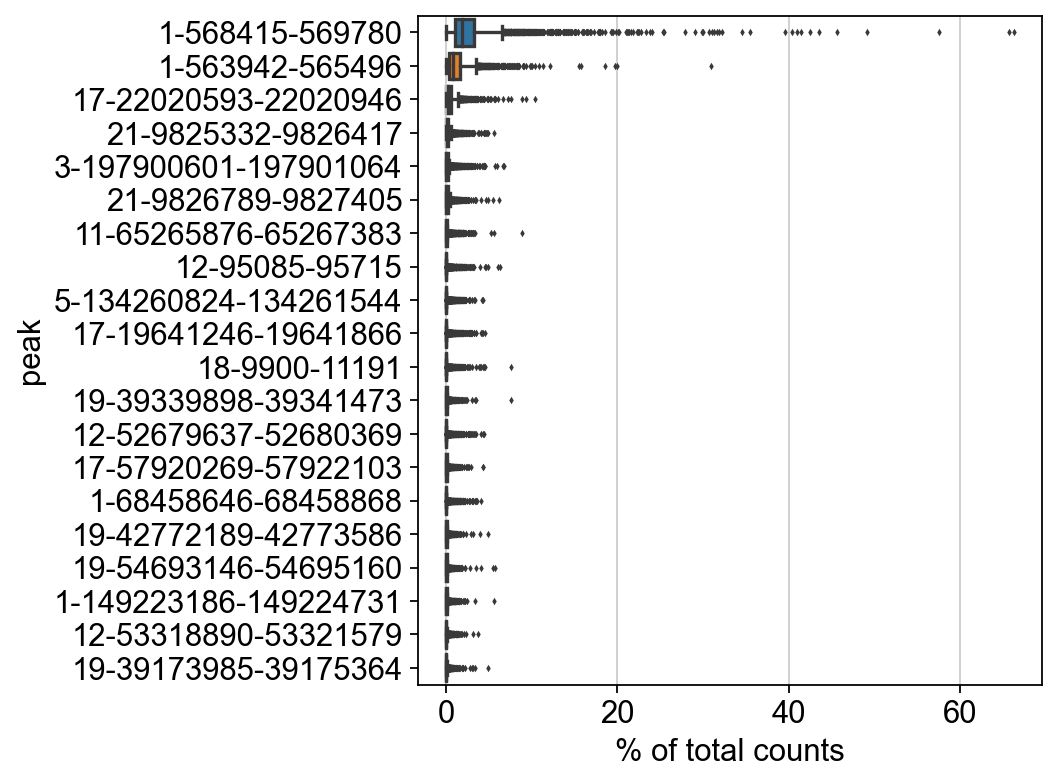

In [153]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

In [154]:
#adata.X[adata.X > 0.] = 1.

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'source' as categorical
... storing 'group' as categorical
... storing 'experiment' as categorical
... storing 'treatment_time' as categorical
... storing 'chr' as categorical
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ign

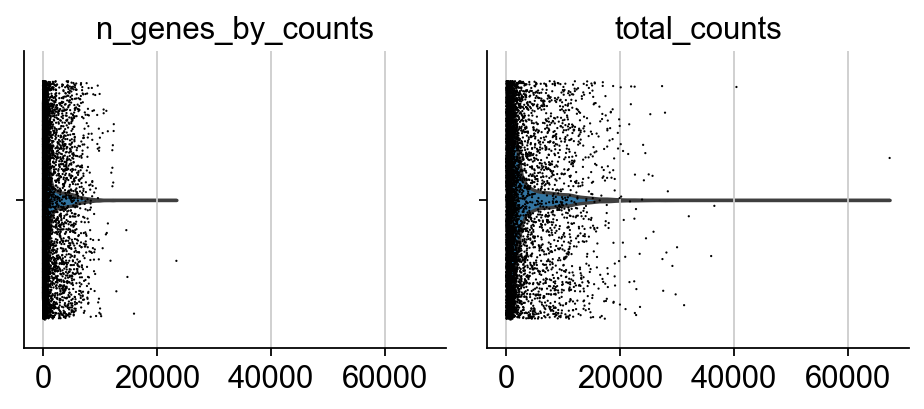

In [155]:
sc.pp.calculate_qc_metrics(adata, qc_vars=[], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


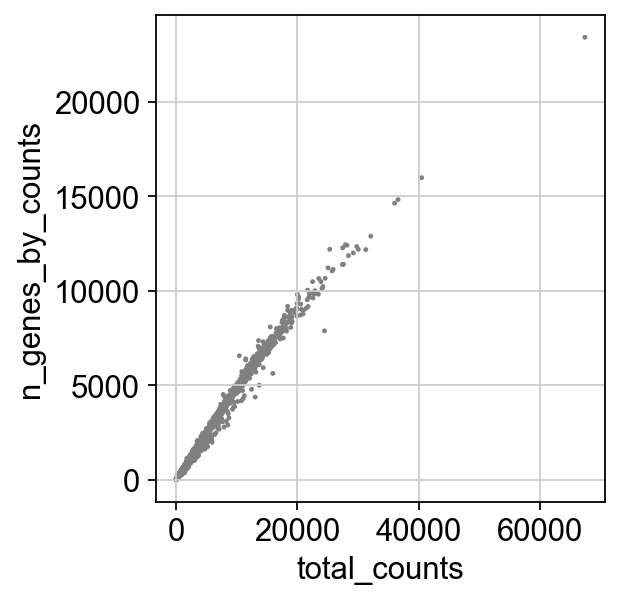

In [156]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [157]:
adata = adata[(adata.obs.total_counts >= 300) & (adata.obs.total_counts <= 20000), :]

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [158]:
# adata = adata[:, adata.var.gene_type == "protein_coding"]
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=5)

filtered out 1220 cells that have less than 300 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 46268 genes that are detected in less than 5 cells


In [159]:
adata

AnnData object with n_obs × n_vars = 3580 × 133020
    obs: 'source', 'group', 'experiment', 'treatment_time', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'peak', 'chr', 'start', 'end', 'length', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [160]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [161]:
sc.pp.highly_variable_genes(adata)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


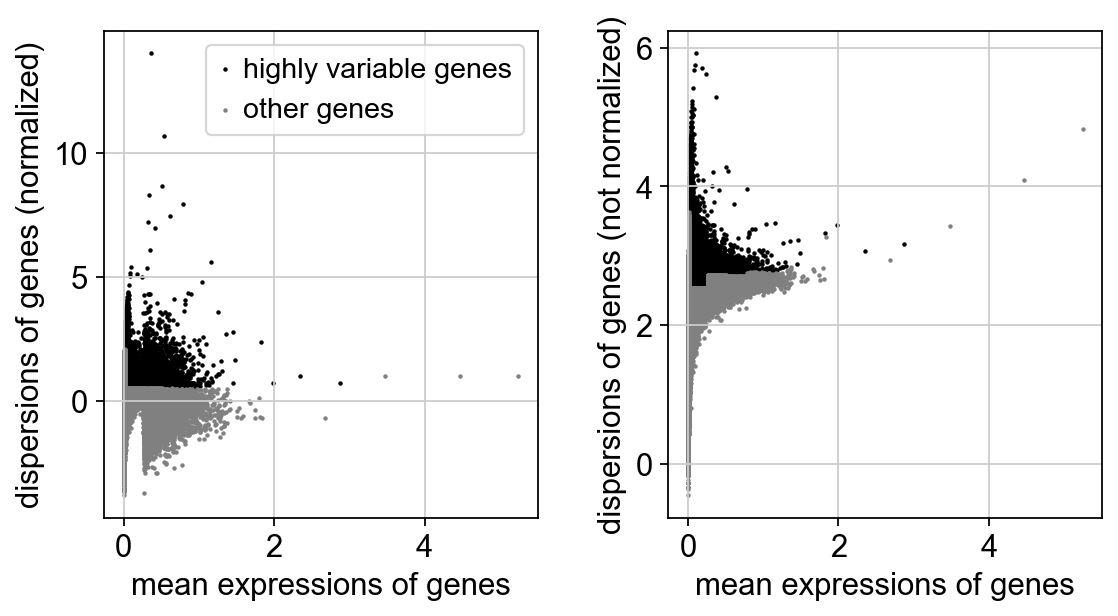

In [162]:
sc.pl.highly_variable_genes(adata)

In [163]:
adata.var.highly_variable.sum()

37887

In [164]:
#adata.raw = adata

In [165]:
#adata = adata[:, adata.var.highly_variable]

In [166]:
import sys
sys.path.insert(0,'..')

import compactmarker

In [167]:
sc.pp.regress_out(adata, ['total_counts'])

regressing out ['total_counts']
    sparse input is densified and may lead to high memory use


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished (0:08:18)


In [168]:
sc.pp.scale(adata, max_value=10)
adata

AnnData object with n_obs × n_vars = 3580 × 133020
    obs: 'source', 'group', 'experiment', 'treatment_time', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'peak', 'chr', 'start', 'end', 'length', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [169]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:15)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


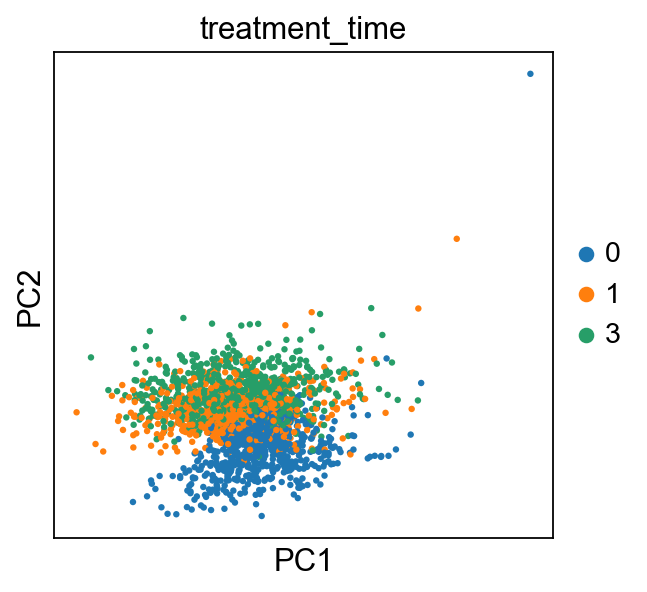

In [170]:
sc.pl.pca(adata, color=['treatment_time'])

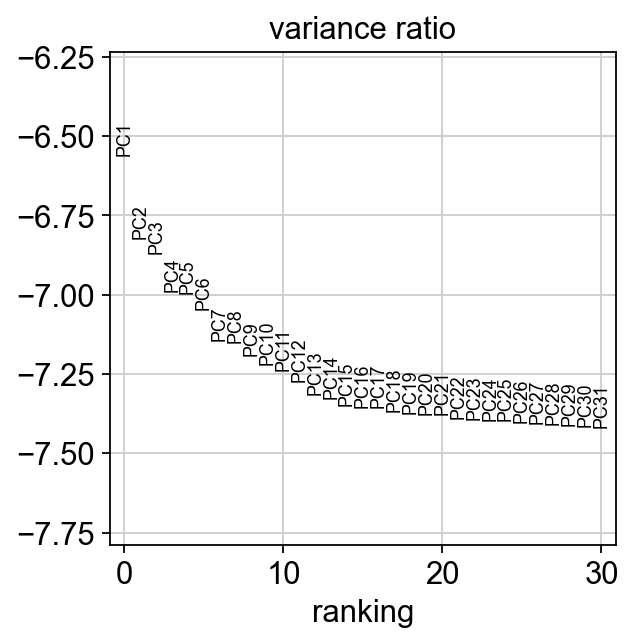

In [171]:
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


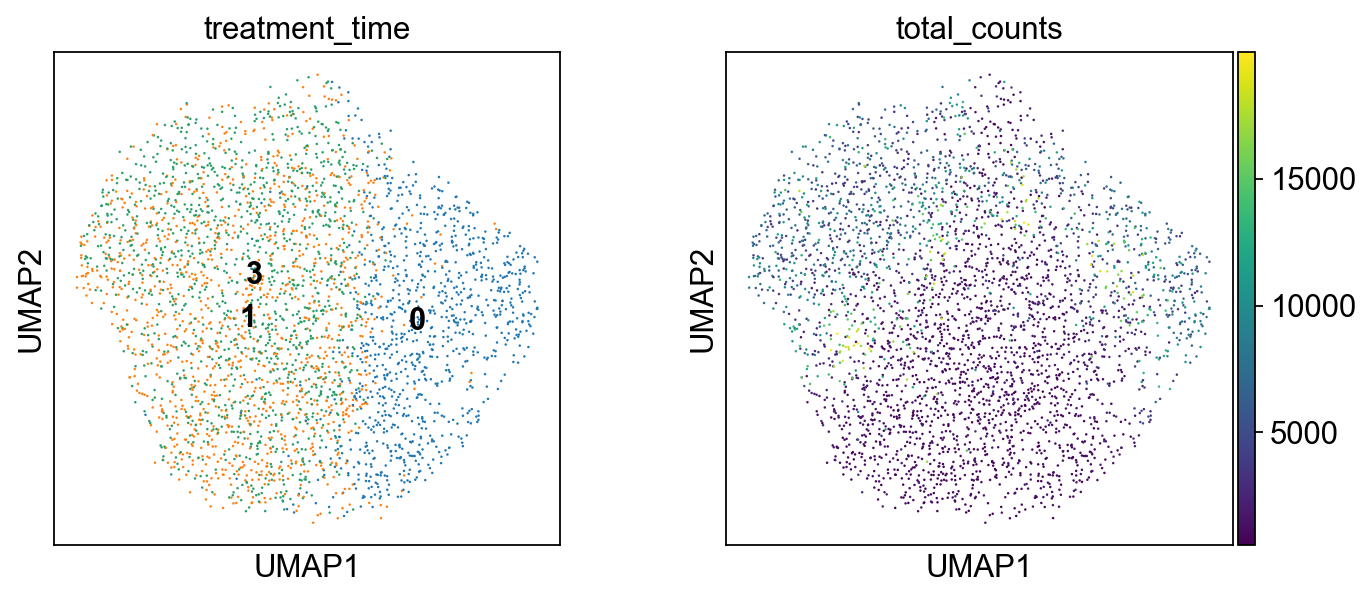

In [172]:
sc.pp.neighbors(adata, n_pcs=15)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['treatment_time', 'total_counts'], legend_loc='on data', size=5.)

,UMAP1,UMAP2,treatment_time
sample,,,
sci-RNA-A-071.CTGAAGAGAC,-4.176722,-5.039095,1-hour
sci-RNA-A-071.GGCTGCCTTA,-8.144611,-3.831046,0-hour
sci-RNA-A-023.AATCGAACTC,-0.276823,-0.886354,1-hour
sci-RNA-A-023.ATGAGTTCTC,-7.511479,-3.676493,0-hour
sci-RNA-A-023.TAGAATAGCC,-6.214170,-7.592634,1-hour
...,...,...,...
sci-ATAConly-118.CGTAAGGAGT,-10.707880,-3.975512,0-hour
sci-ATAConly-118.ATGAGTTCTC,-8.785486,-1.737620,0-hour
sci-ATAConly-118.TCTATCGGTA,-1.769733,-1.345214,3-hour


In [189]:
[sns.color_palette("tab10")[i] for i in [1, 0, 2]]

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

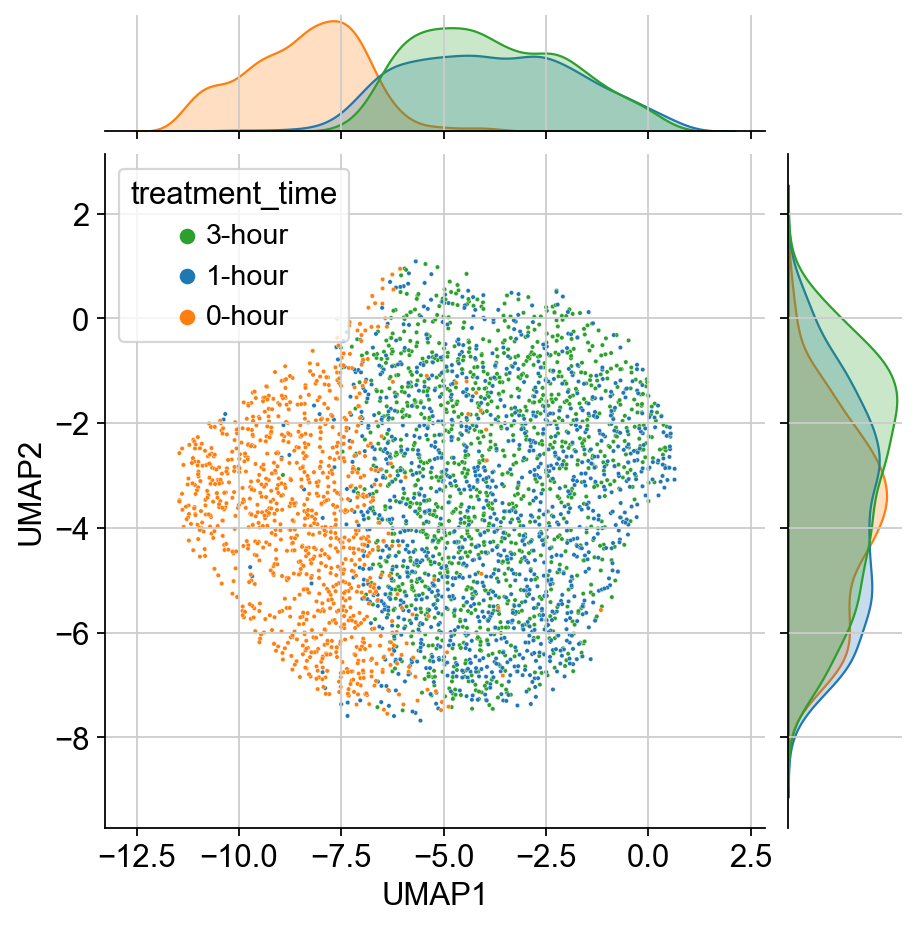

In [193]:
df = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
df['treatment_time'] = [i + '-hour' for i in adata.obs['treatment_time'].tolist()]
df['UMAP1'] = -df['UMAP1']
sns.jointplot(data=df.sort_values(by='treatment_time', ascending=False), x="UMAP1", y="UMAP2", hue="treatment_time", s=4, 
              palette=[sns.color_palette("tab10")[i] for i in [2, 0, 1]])

In [182]:
df.index = adata.obs_names
df.to_pickle("a549-atac-umap.pkl")

In [219]:
tf = pd.read_hdf("a549-motif.hdf", "motif")

In [220]:
df_peak = pd.DataFrame(adata[tf.index.tolist(), :].X, index=tf.index, columns=adata.var_names)
df_peak

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


peak,1-9963-10665,1-29054-30366,1-91105-91605,1-133566-134066,1-135895-136395,1-137965-138465,1-234484-234984,1-237639-237872,1-360366-360566,1-525043-525243,...,Y-28816652-28817664,Y-28817780-28818002,Y-58827246-58827468,Y-58856009-58856209,Y-58862601-58862838,Y-58979330-58979530,Y-58992371-58992631,Y-58995548-58995784,Y-59016929-59017246,Y-59026458-59026658
sci-RNA-C-091.TCTATCGGTA,-0.462297,-0.005890,-0.029185,0.001729,-0.006477,0.001262,-0.028352,-0.040759,-0.059672,-0.058364,...,-0.077266,-0.015810,-0.075989,-0.037568,-0.040341,-0.041891,-0.029939,-0.020708,-0.021628,-0.032583
sci-RNA-D-058.AAGCATCCTA,-0.456264,-0.010410,-0.031898,-0.004537,-0.010938,-0.004936,-0.029889,-0.043972,-0.057596,-0.056411,...,-0.084975,-0.023334,-0.077601,-0.040208,-0.040555,-0.042906,-0.031785,-0.023389,-0.027675,-0.034350
sci-RNA-D-019.ACGATAGACT,-0.465793,-0.003271,-0.027613,0.005360,-0.003892,0.004853,-0.027462,-0.038898,-0.060874,-0.059496,...,-0.072800,-0.011451,-0.075056,-0.036038,-0.040217,-0.041303,-0.028869,-0.019154,-0.018124,-0.031559
sci-RNA-B-055.TCTATCGGTA,-0.458586,-0.008671,-0.030854,-0.002126,-0.009221,-0.002551,-0.029298,-0.042736,-0.058395,-0.057163,...,-0.082009,-0.020439,-0.076981,-0.039192,-0.040473,-0.042516,-0.031075,-0.022357,-0.025348,-0.033670
sci-RNA-A-068.TTGCAGCATT,-0.466967,-0.002391,-0.027085,0.006580,-0.003024,0.006059,-0.027163,-0.038272,-0.061278,-0.059876,...,-0.071299,-0.009986,-0.074742,-0.035524,-0.040176,-0.041105,-0.028510,-0.018632,-0.016947,-0.031215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sci-RNA-E-044.GGCTCGAGAT,-0.457952,-0.009146,-0.031140,-0.002784,-0.009690,-0.003203,-0.029459,-0.043074,-0.058176,-0.056957,...,-0.082819,-0.021230,-0.077150,-0.039470,-0.040495,-0.042623,-0.031269,-0.022639,-0.025984,-0.033856
sci-RNA-A-044.CGTCTATGAA,2.157020,-0.016426,-0.035510,-0.012878,-0.016875,-0.013186,-0.031935,-0.048249,-0.054833,-0.053811,...,-0.095236,-0.033349,-0.079746,-0.043724,-0.040839,-0.044258,-0.034242,-0.026957,-0.035725,-0.036702
sci-RNA-E-065.CCTAAGCGGT,-0.451095,-0.014283,-0.034223,-0.009906,-0.014760,-0.010247,-0.031206,-0.046725,-0.055818,-0.054737,...,-0.091580,-0.029781,-0.078981,-0.042471,-0.040738,-0.043776,-0.033367,-0.025686,-0.032857,-0.035864
sci-RNA-E-028.GCGGTTATTG,-0.455671,-0.010855,-0.032165,-0.005154,-0.011377,-0.005546,-0.030041,-0.044288,-0.057392,-0.056219,...,-0.085734,-0.024075,-0.077759,-0.040468,-0.040576,-0.043006,-0.031967,-0.023652,-0.028271,-0.034524


In [236]:
adata.var

,peak,chr,start,end,length,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
peak,,,,,,,,,,,,,,,,
1-9963-10665,1-9963-10665,1,9963,10665,702,805,0.318371,87.140575,1993.0,633,True,1.097876,3.013239,2.303191,2.497401e-10,0.893167
1-29054-30366,1-29054-30366,1,29054,30366,1312,5,0.000958,99.920128,6.0,5,False,0.001945,0.526640,-2.415499,1.747405e-11,0.032843
1-91105-91605,1-91105-91605,1,91105,91605,500,9,0.002236,99.856230,14.0,9,False,0.007499,1.560148,-0.916107,3.674562e-12,0.067322
1-133566-134066,1-133566-134066,1,133566,134066,500,7,0.001438,99.888179,9.0,7,False,0.002772,0.898005,-1.876730,1.235005e-11,0.039164
1-135895-136395,1-135895-136395,1,135895,136395,500,5,0.000958,99.920128,6.0,5,False,0.001976,0.505286,-2.446479,7.819622e-13,0.033198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y-58979330-58979530,Y-58979330-58979530,Y,58979330,58979530,200,14,0.003035,99.776358,19.0,12,False,0.015856,2.488539,0.430784,-1.528358e-11,0.091901
Y-58992371-58992631,Y-58992371-58992631,Y,58992371,58992631,260,11,0.002875,99.824281,18.0,9,False,0.010635,2.338237,0.212729,3.271336e-11,0.076084
Y-58995548-58995784,Y-58995548-58995784,Y,58995548,58995784,236,6,0.001438,99.904153,9.0,6,False,0.004191,1.264650,-1.344809,-1.284471e-12,0.050599


In [240]:
adata.var.sort_values("total_counts", ascending=False).iloc[:50, ].index.tolist()

['1-568415-569780',
 '1-563942-565496',
 '17-22020593-22020946',
 '21-9825332-9826417',
 '21-9826789-9827405',
 '3-197900601-197901064',
 '19-39339898-39341473',
 '17-57920269-57922103',
 '19-42772189-42773586',
 '19-54693146-54695160',
 '12-53318890-53321579',
 '1-149223186-149224731',
 '19-39173985-39175364',
 '19-39902423-39904452',
 '11-65265876-65267383',
 '19-41769319-41771027',
 '17-8089321-8091375',
 '9-73033086-73036019',
 '12-52540791-52542779',
 '19-50379506-50382216',
 '19-33667373-33668962',
 '15-60689229-60691441',
 '12-125423646-125425060',
 '19-47758737-47761346',
 '12-53773139-53774560',
 '2-44394608-44396498',
 '19-41220540-41222372',
 '17-73029740-73031747',
 '17-45726342-45728562',
 '8-8085204-8086468',
 '12-52673854-52675240',
 '17-1619317-1621032',
 '10-47057243-47058423',
 '1-16839831-16841280',
 '12-95085-95715',
 '3-119812513-119814710',
 '5-180648778-180651166',
 '19-50143315-50144338',
 '17-57914489-57915863',
 '2-24306665-24308585',
 '2-27273032-27274773',
 

In [221]:
df_peak.to_hdf("a549-peak.hdf", 'peak')

In [222]:
adata.obs.loc[tf.index.tolist(), :].to_csv('a549-anno.csv')

In [223]:
print(*[i for i in adata.obs.loc[tf.index.tolist(), 'treatment_time']])

3 0 3 3 1 1 3 3 3 1 1 3 1 1 3 3 3 3 3 3 3 3 0 0 3 1 0 1 3 1 1 3 3 3 3 0 3 1 1 1 1 1 1 1 3 0 3 3 3 0 0 1 3 3 0 1 1 1 3 3 0 1 3 3 3 3 1 3 1 1 1 0 3 3 1 3 3 3 0 1 3 1 1 3 1 1 0 3 1 3 1 1 0 1 3 3 1 3 3 1 3 1 3 1 0 1 0 3 1 3 1 0 3 3 1 3 0 0 0 3 0 1 0 3 0 1 0 0 1 1 1 1 0 1 3 3 0 1 1 0 0 3 1 0 0 0 3 1 0 0 3 1 1 1 0 3 3 1 1 1 3 0 1 0 3 1 3 1 3 1 1 3 1 3 0 0 3 0 1 1 1 1 0 1 1 0 0 1 3 3 1 3 1 0 3 3 0 3 0 1 1 1 1 1 0 1 3 1 0 1 3 0 0 0 3 3 0 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 0 3 3 1 0 1 3 3 3 1 3 3 0 1 1 3 3 1 3 1 1 3 1 0 1 1 1 0 3 1 1 1 1 0 0 1 3 3 0 1 1 3 3 0 3 3 3 0 0 3 3 0 0 1 3 3 0 3 1 3 3 0 0 0 1 0 1 3 1 1 1 0 0 1 3 1 3 0 1 3 1 1 3 0 3 3 3 1 1 3 0 3 0 1 3 3 3 1 3 0 0 1 0 1 0 3 1 1 0 1 1 3 0 1 1 3 0 3 3 0 3 3 0 1 1 0 0 3 1 3 0 0 1 3 3 3 1 3 1 1 0 0 0 3 1 0 3 3 3 0 0 0 1 3 1 3 1 3 3 3 3 1 1 3 0 0 3 1 3 0 3 0 0 3 0 3 1 1 3 0 1 3 1 3 3 3 3 1 0 1 3 3 3 0 1 1 3 3 1 3 0 1 1 1 3 1 1 1 0 1 3 1 3 1 3 1 1 3 3 1 1 3 1 0 3 3 3 1 1 1 3 3 0 3 3 3 3 0 1 1 3 3 0 0 1 1 1 3 1 3 3 1 1 1 0 3 1 3 3 3 0 3 1 1 0 

In [230]:
tf.columns[tf.columns.str.contains("NR3C")].tolist()

['MA0113.3_NR3C1', 'MA0727.1_NR3C2']